# 線形モデルによる2項分類

In [19]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# 線形サポートベクターマシンとロジスティック回帰モデル

2つのモデルはL2正規化を用いて分類を行う。

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


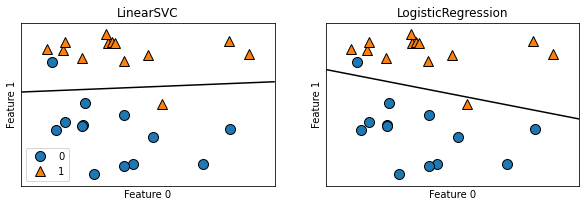

In [20]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

2つのモデルにはパラメータCがある。  
Cが大きくなれば正規化が弱くなり、個々のデータを正確にクラス分類を行うようになる。  
Cが小さい場合は1つ1つのデータではなく、大多数の分類を行うようになる。

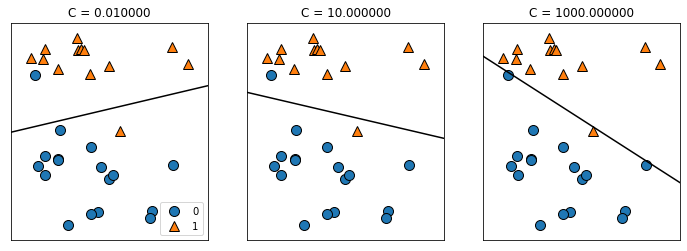

In [21]:
mglearn.plots.plot_linear_svc_regularization()

# 2項分類を用いた多項分類

多項分類場合、複数の2項分類を組み合わせることで行うことができる。  
1つの項目かその他の項目を2項分類し、そのスコアが一番高いものが勝ちになる。

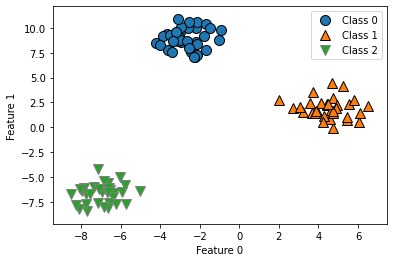

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## 線形サポートベクターマシンモデルの学習

In [23]:
lsvm = LinearSVC().fit(X, y)

In [24]:
lsvm.coef_.shape

(3, 2)

In [25]:
lsvm.intercept_.shape

(3,)

## 予測結果の表示

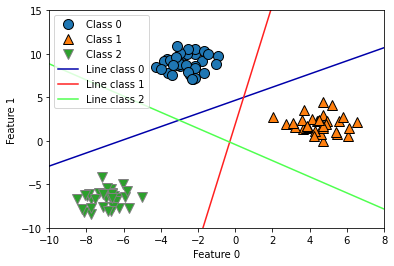

In [26]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])

Text(0, 0.5, 'Feature 1')

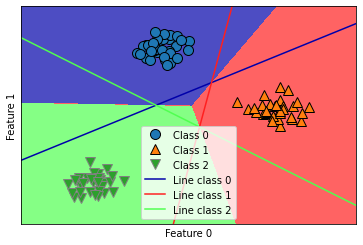

In [30]:
mglearn.plots.plot_2d_classification(lsvm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")